# Assignment 1

In [1]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import folium
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load data
crime = pd.read_csv('Crime_Data.csv')
#crime.head()

In [3]:
# Set of crimes if interest
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# Only consider data from 2003-2017
crime["Date"] = pd.to_datetime(crime["Date"])
crime['year'] = crime['Date'].dt.year
crime = crime[crime.year != 2018]


*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

**Now we will consider some weekly patterns in the focus crimes**

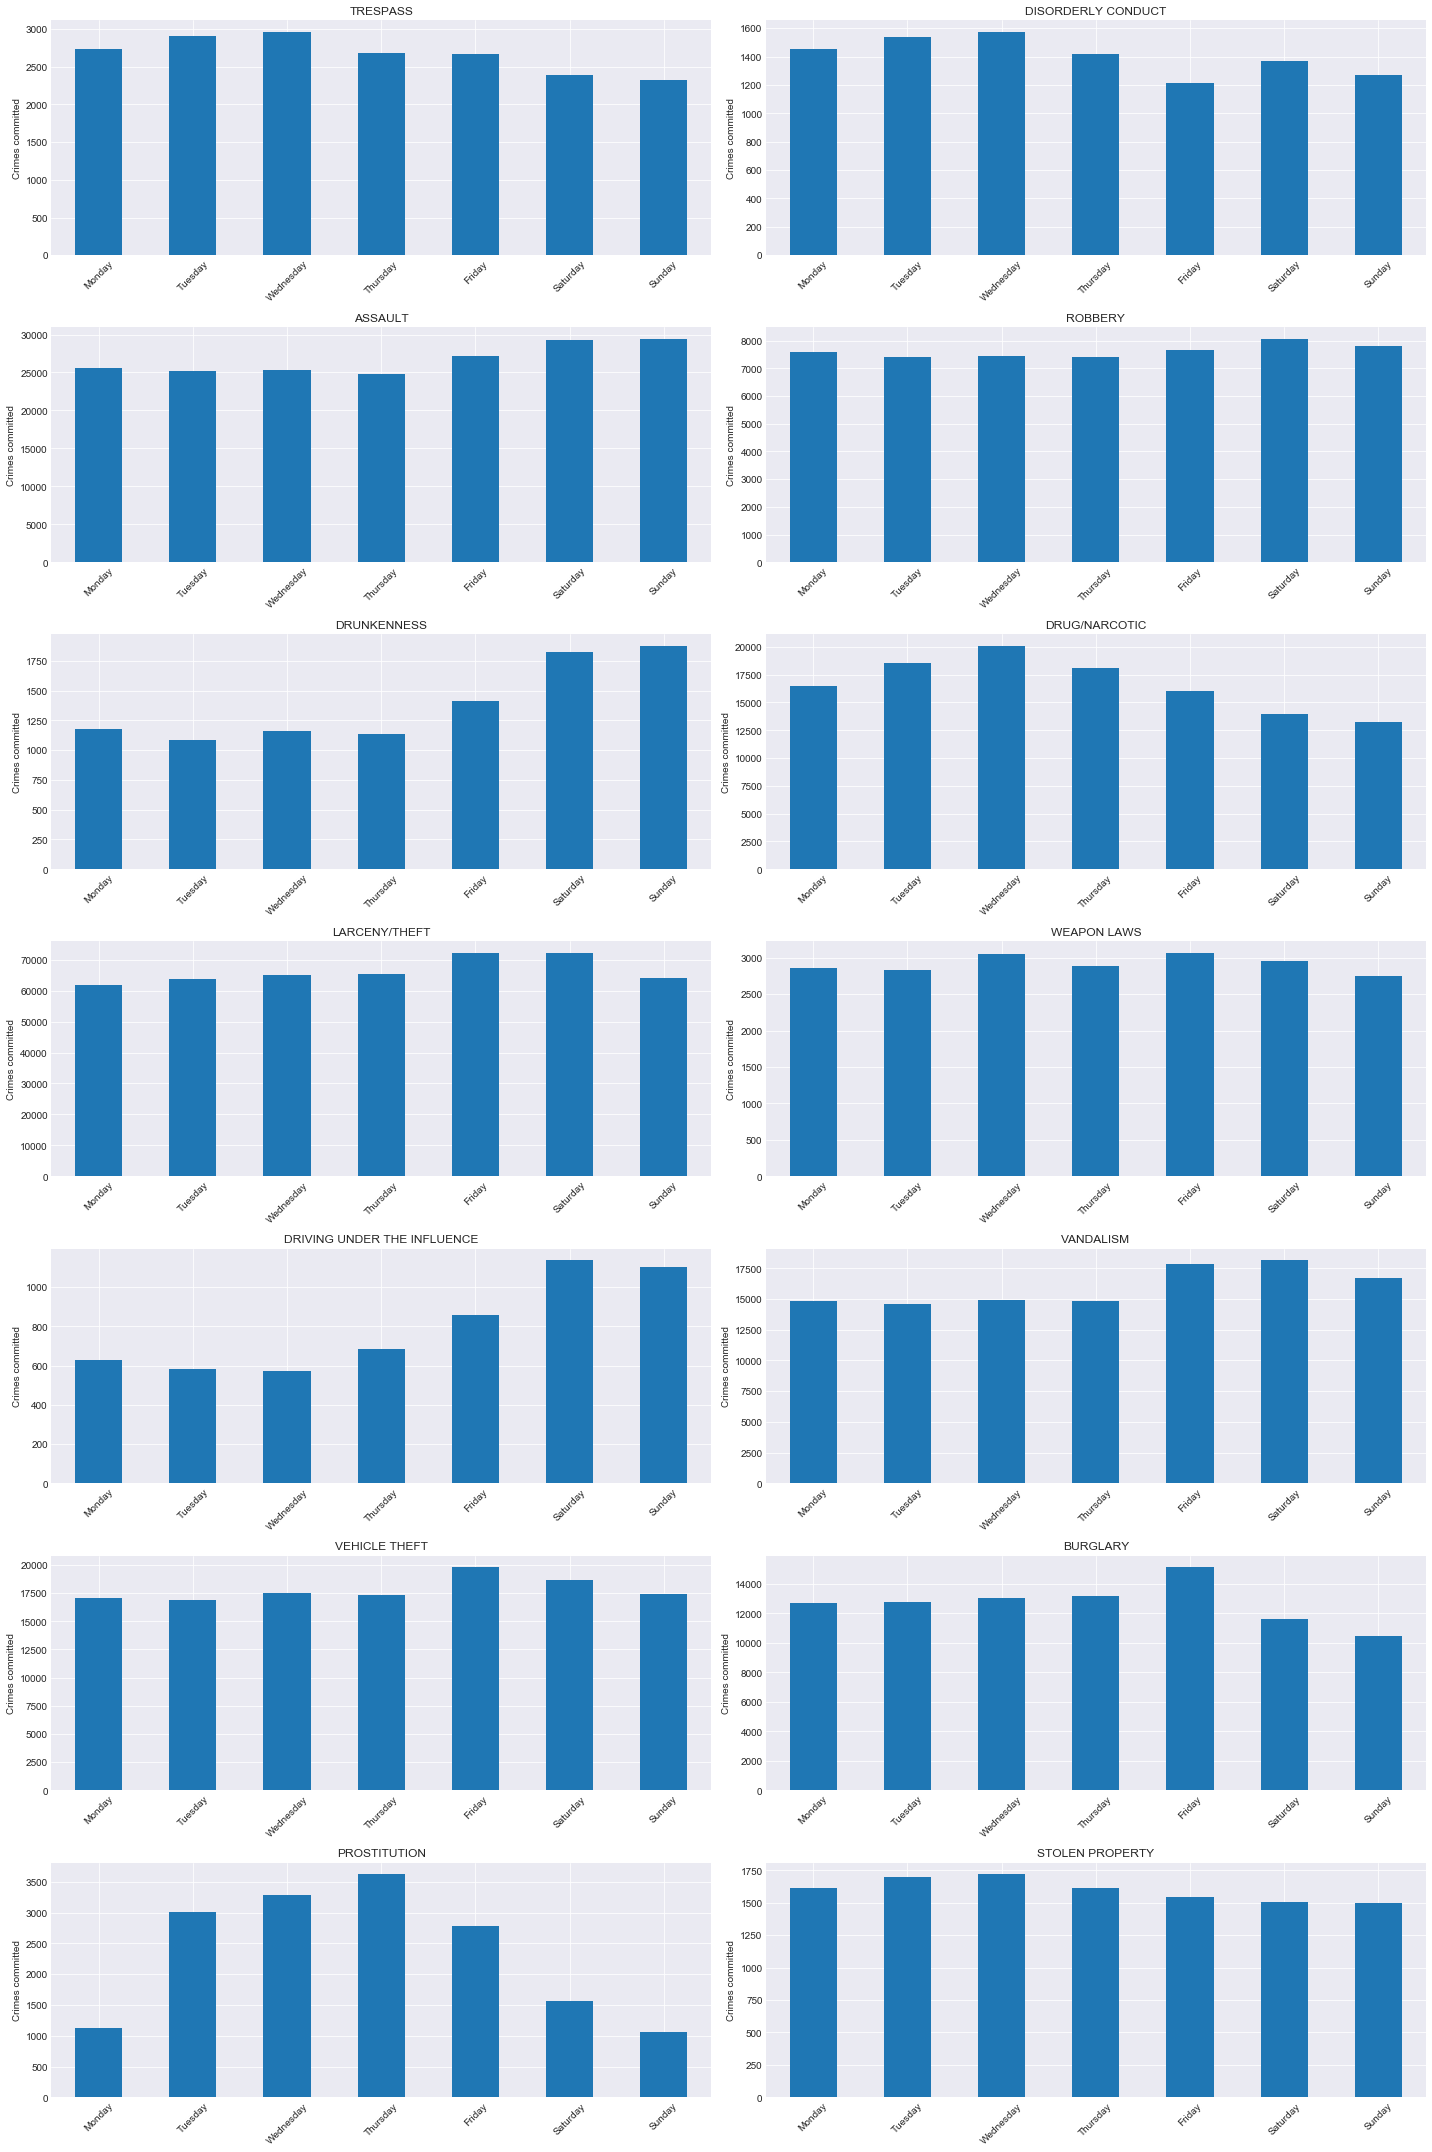

In [4]:
# Generate plots of weekly patterns
plt.figure(figsize=(20,30))
week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for idx, crimes in enumerate(focuscrimes):
    plt.subplot(7,2,idx+1).set_title(crimes)
    crime[crime.Category == crimes].groupby('DayOfWeek').Category.count().reindex(week).plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('Crimes committed')
    plt.xticks(rotation=45)

plt.tight_layout();
plt.show();

Shown on the plot above is the frequency of crimes on a given weekday, giving insights in the weekly patterns for each crime. However, note that this is a sum of all the crimes committed on that given weekday over the entire timeperiod considered. Thus it does not necessarily reflect an average week or a repeated weekly pattern. 

A group of crimes have a close to stable weekly pattern, meaning that the total number of crimes committed on a given weekday is almost the same for all weekday. This holds for crimes like robbery, stolen property, vehicle theft and weapon laws. 

It is seen that some of the crimes tend to be more frequent in the weekend. This includes vandalism, driving under influence, larceny/theft, drunkenness, assault and vehicle theft. The opposite trend is also observed, as some crimes tend to be less frequent in the weekend as for instance burglary and drug/narcotic related crimes. 

Prostitution has a completely different weekly pattern than the rest of the crimes. It is most frequent from Tuesday to Friday, peaking on Thursday. 

**Next the monthly patterns will be considered**

In [5]:
# Get the month from the date and hour and minute from the time. 
crime['month'] = crime['Date'].dt.month
crime['minute'] = pd.to_datetime(crime['Time'],format= '%H:%M').dt.minute
crime['hour'] = pd.to_datetime(crime['Time'],format= '%H:%M').dt.hour
crime['day'] = crime['Date'].dt.weekday
num2month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 
             8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
crime['monthAbb'] = crime.month.apply(lambda x: num2month[x])

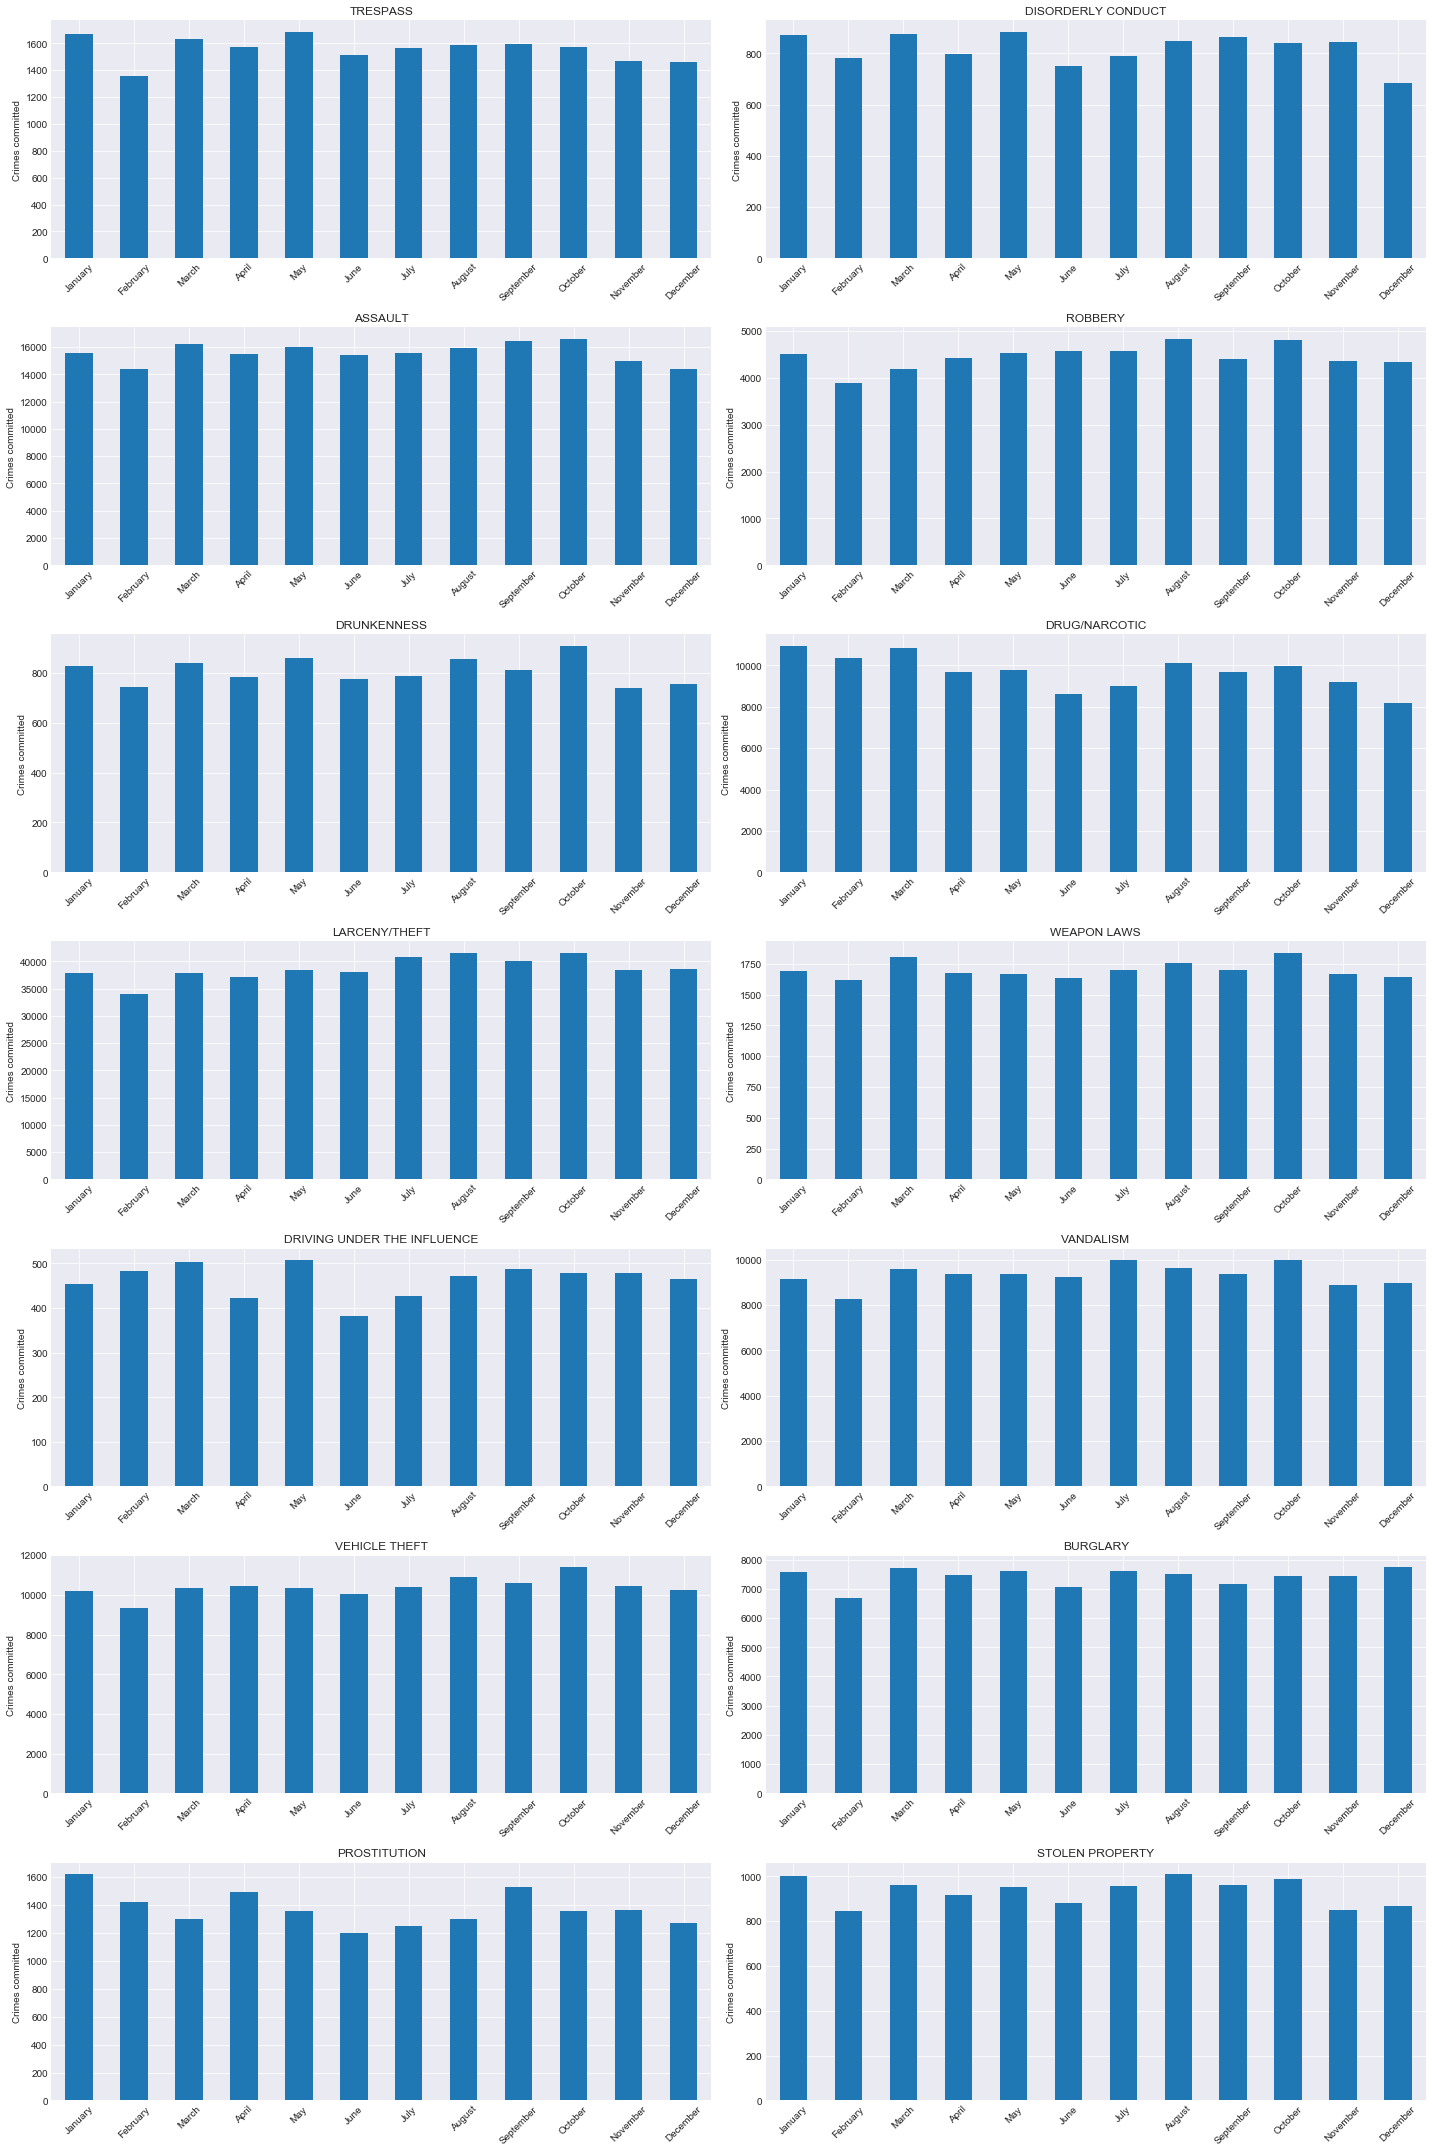

In [6]:
# Generate plots showing the monthly patterns
plt.figure(figsize=(20,30))
month = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
for idx, crimes in enumerate(focuscrimes):
    plt.subplot(7,2,idx+1).set_title(crimes)
    crime[crime.Category == crimes].groupby('monthAbb').Category.count().reindex(month).plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('Crimes committed')
    plt.xticks(rotation=45)

plt.tight_layout();
plt.show();

This plot shows the frequency of a crime in a given month, giving insights in the monthly pattern for each crime. However, note that this is a sum of all the crimes committed in that given month over the entire time period. Thus it does not necessarily reflect an average month or a repeated monthly pattern.

When looking at the months from an overall perspective, there does not seem to be large fluctuations in the number of crimes. Peak months and valley months do not stand out, but seem to be fairly close to the average number of crimes for each crime considered, i.e. the variance is small. 
Some crimes e.g. Drug/narcotic, prostitution and driving under influence, share the months where they are least frequent. For the crimes just mentioned these months are June and July. December also seem to be a month where the number of crimes go down. As an example this holds for the crimes weapon laws, drunkenness, and drug/narcotics. 

An interesting observation is that June, July and December are the typical holiday months (Summer holiday and Christmas holiday) where most people have time off. 

**The next task is to investigate the 24-hour cycle of the crimes**

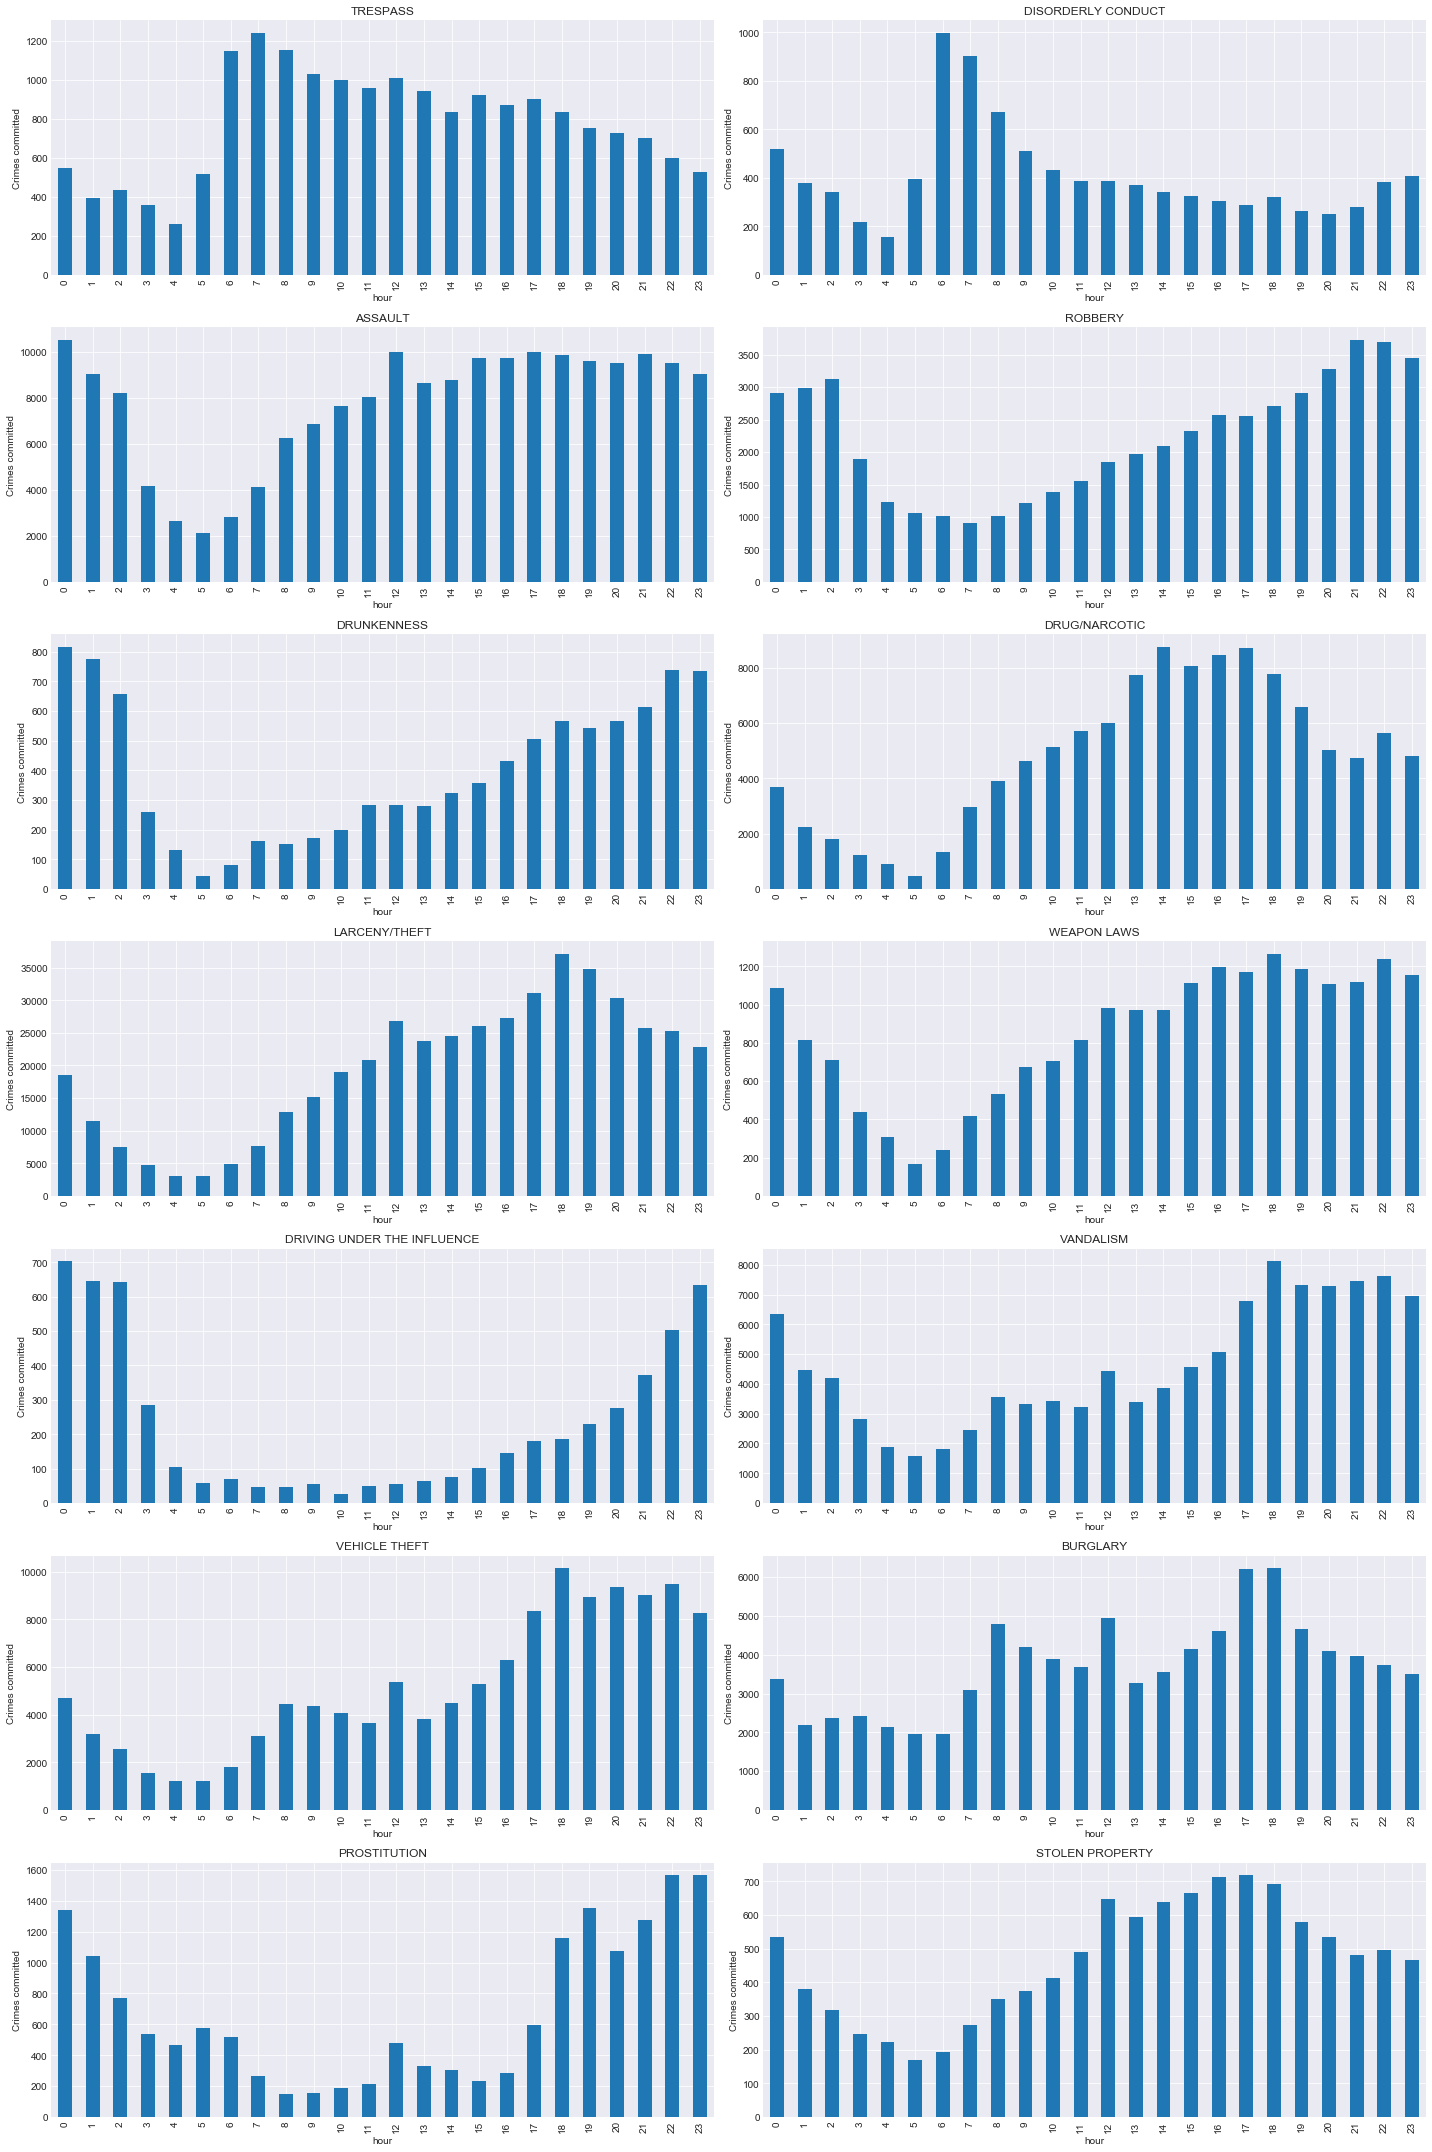

In [7]:
# Generate plots showing the 24-hour cycle of the crimes
plt.figure(figsize=(20,30))
for idx, crimes in enumerate(focuscrimes):
    plt.subplot(7,2,idx+1).set_title(crimes)
    crime[crime.Category == crimes].groupby('hour').Category.count().plot(kind='bar')
    plt.xlabel('hour')
    plt.ylabel('Crimes committed')

plt.tight_layout();
plt.show();

These plots give insights in the frequency of crimes on a specific hour of the day for a specific crime. However, note that this is a sum of all the crimes committed in that given hour over the entire time period. Thus it does not necessarily reflect an average hour or a repeated hourly pattern.

When looking at the hours from an overall perspective, there is a clear tendency for crimes to have low frequency in the late night hours from 3 AM to 6 AM. 
In general two overall trends are observed when the hourly development in the number of crimes is considered. Either the crimes become more frequent during the day or less frequent. Robbery is a clear example of the first trend, where the frequency seem to grow linearly. For trespassing the number of crimes decreases during the day. 

**Lastly the 168 hours of the week is considered**

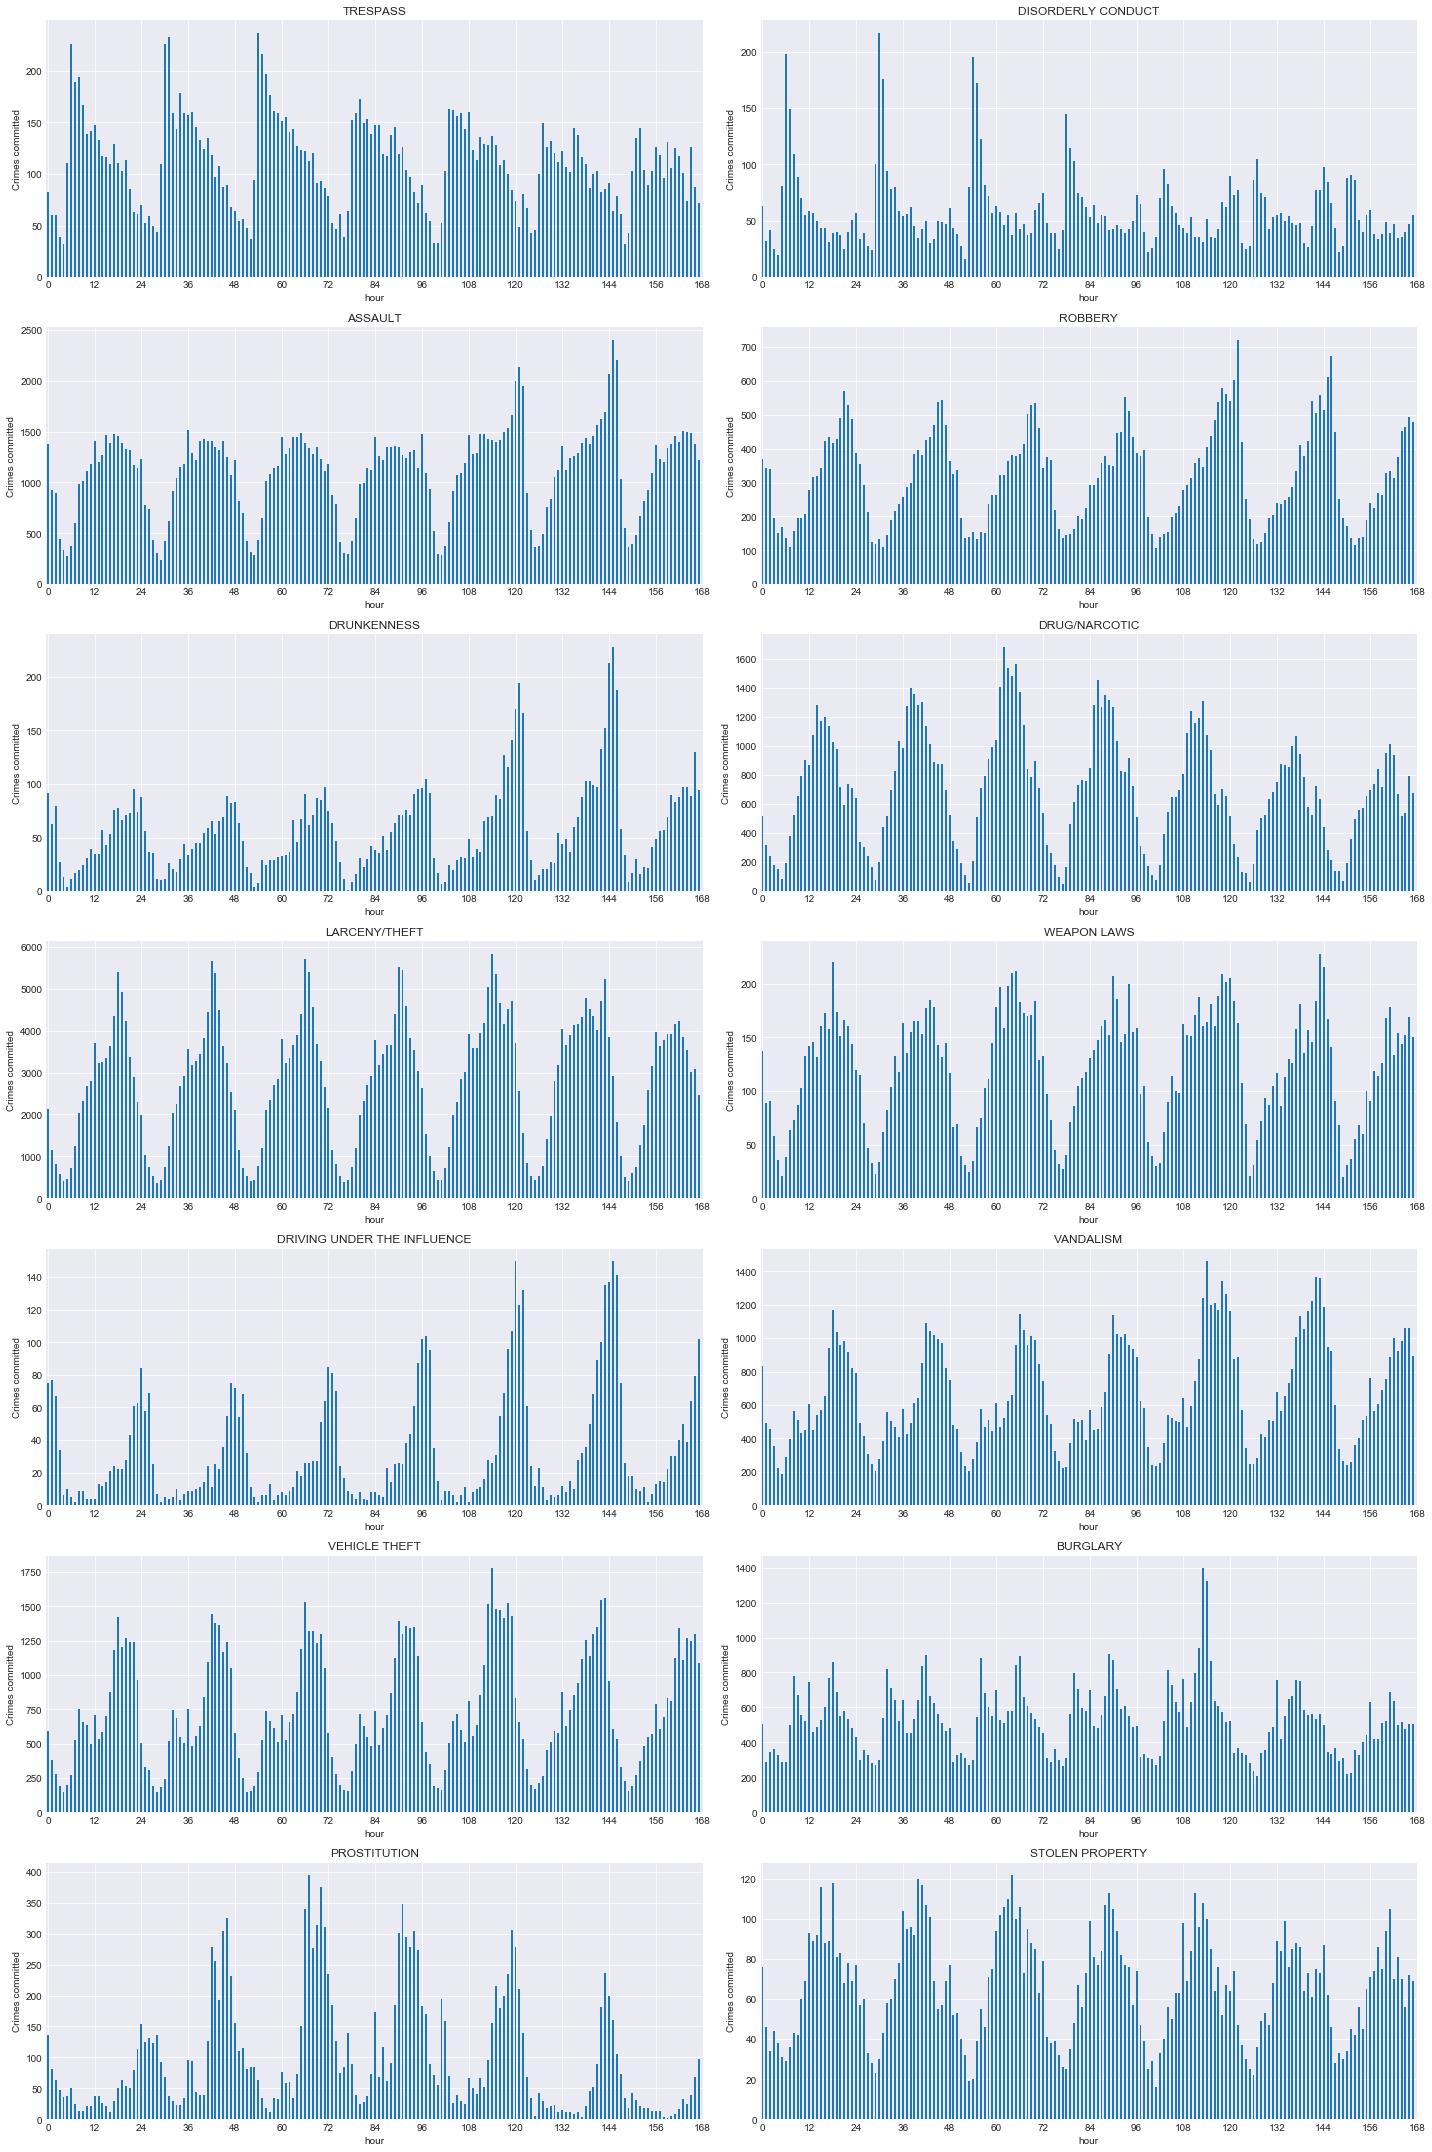

In [8]:
# Calculate the corresponding our of the week
crime['dayhours'] = crime['Date'].dt.dayofweek*24
crime['Allweekhours'] = crime['dayhours']+crime['hour']

# Generate plots showing the 168 hours of the week for each crime
plt.figure(figsize=(20,30))
for idx, crimes in enumerate(focuscrimes):
    plt.subplot(7,2,idx+1).set_title(crimes)
    crime[crime.Category == crimes].groupby(['Allweekhours']).Category.count().plot(kind='bar')
    plt.xlabel('hour')
    plt.ylabel('Crimes committed')
    plt.xticks(np.arange(0,169,12),np.arange(0,169,12),rotation=0)

plt.tight_layout();
plt.show();

In these plots the frequency of crimes are shown for every hour during the week. This will give a more detailed view on the weekly pattern and allow new insights. However, note that this is a sum of all the crimes committed in a given hour of the week over the entire timeperiod. Thus it does not necessarily reflect an average hour of the week or a repeated hour-of-the-week pattern. Time is on the x-axis starting from 0 meaning midnight on Monday and going all the way to 168 being 11 pm on Sunday. 

This deep dive into the weekly pattern shows that for some crimes, the weekday where the crime is most frequent is due to a few hours with an unusually high number of crimes. Otherwise the overall number of crimes on an hourly basis shows a repeated pattern throughout the week. An example is assault where Monday-Thursday and Sunday have approximately the same pattern, but Friday and Saturday deviate from this pattern as the number of crimes commited during the night (around midnight) is significantly higher. Other crimes that also seem to follow this pattern are trespass, disorderly conduct, robbery, drunkenness, and burglary. 

Vehicle theft, larceny/theft, weapon laws and stolen property have very similar daily patterns on an hourly basis - meaning that weekly patterns of these crimes are somewhat stable. 

Another observation is that some of the crimes have a daily pattern where the shape of the frequencies within 24-hours are similar. The only change is that some of daily patterns are scaled differently, i.e. every hour is scaled by some constant. As an example drug/narcotic can be considered.

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

**Pearson Correlation**

The pearson correlation is a measure of the linear relationship between two sets of data. It is a number between -1 and 1, where -1 is a strong negative relation, 1 is a strong positive relation and 0 indicates no relation. The Pearson correlation is defined as follows.

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_Y \sigma_X}$

where $cov(X,Y)$ is the covariance between $X$ and $Y$ and $\sigma_Z$ is the standard deviation for $Z=\{X,Y\}$

From the equation it is clear that the pearson correlation would be undefined if either of the datasets $X$ and $Y$ have a standard deviation of 0. 

As the pearson correlation measures the linear relationsip between datapoints it fails to detect non-linear relationships. E.g. for a parabola the pearson correlation will be close to 0, indicating no relationship, however it is clear that there is in fact a relationship between the datapoints, which is easy to detect if the data is visualized.

**Bar-chart vs histogram**

Histograms are used to show the distribution of variables (the frequency of the observations in predetermined intervals (bins)), whereas bar-charts are used to compare categories of variables. Thus, a bar-chart is a special case of a histogram where each bin corresponds to a category of variables.

**The right bin-size in histograms**

Bin-size could be either the bin width or the number of bins. When one is chosen, the other can be calculated. Two rules are considered here; one for choosing the bin width (Scott's rule) and one for choosing the number of bins (Sturges' rule).

Scott's rule:

$w = \frac{3.5 \sigma}{\sqrt[3]{n}} $

The input $n$ is the number of observations in the dataset, and $\sigma$ is the standard deviation of the dataset. The output $w$ is the width of the bins in the histogram.

It is assumed that the data follows a normal distribution, otherwise the bin width may likely be too wide.

Reference: DAOST chapter 2.

Sturges' Rule: 

$$k = \lceil log_2 n \rceil + 1$$

Input $n$ is the number of observations in the dataset and the output is the number of bins $k$. 
To avoid poor performance, at least n>30 data points must be available (otherwise the number of bins will be very small) and the data should preferably be symmetric and normally distributed.

Reference: https://en.wikipedia.org/wiki/Histogram#Sturges'_formula

Both rules have simple formulas and are easy to use, however the drawback is the data is assumed to follow a normal distribution. Moreover, the rules should be considered as an initial guess and not necessarily the most optimal bin width or number of bins.


## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

To create the jitterplot, where all datapoints are visible, a subset of the original data is needed. In the subset only vehicle theft is considered, registered in the first 6 monhts of 2014 between the hours 17:00 and 18:00. 

In [9]:
# Only one crime considered - vehicle theft
sub_df = crime[crime.Category == 'VEHICLE THEFT']
# Only crimes between 17 and 18 o'clock
sub_df = sub_df[sub_df.hour == 17]
# Only in year 2014
sub_df = sub_df[sub_df.year == 2014]
# only in month 1-6 (jan to jun)
sub_df = sub_df[(sub_df.month >= 1) & (sub_df.month <= 6)]

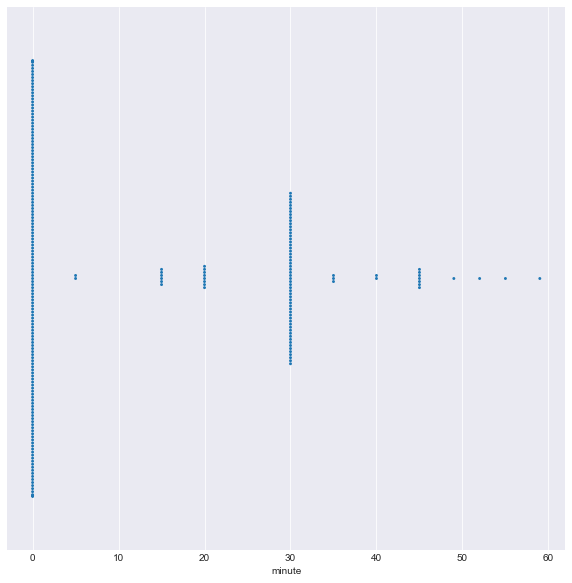

In [10]:
# jitter plot of sub_df
plt.figure(figsize=(10,10))

sns.swarmplot(x='minute', data=sub_df,size=2.9)
sns.despine()

The plot above is a jitterplot where each blue point corresponds to an observation in the data set. Time is on the x-axis and is measured in minutes. 

This jitterplot shows that crimes are typically registered on the hour or half past. It is unlikely that crimes are committed exactly on a multiple of quarter of an hour, which could indicate that there is another explanation to this. It is possible that the police do not focus that much on the exact time when registering a crime, and therefore choose a "neat" time instead that's close enough to the actual time of the crime. 

**Histograms of geographical data**

In the following another subset of the data is used. Two types of crimes are chosen: vehicle theft and weapon laws. These are chosen as they have different geographical patterns as is also shown below. To reduce the number of datapoints, only data from 2016 is included. A bin size of 50 is used for both the following histograms. 

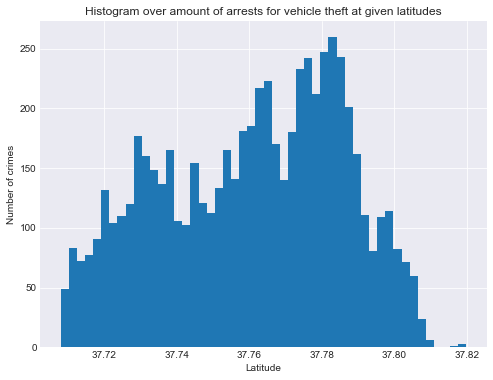

In [11]:
df_hist_vehicle = crime[(crime.Category == 'VEHICLE THEFT') & (crime.year == 2016)]
df_hist_weapon = crime[(crime.Category == 'WEAPON LAWS') & (crime.year == 2016)]

plt.figure(figsize=(8,6))
plt.hist(df_hist_vehicle.Y, bins=50);
plt.xlabel('Latitude')
plt.ylabel('Number of crimes')
plt.title('Histogram over amount of arrests for vehicle theft at given latitudes');

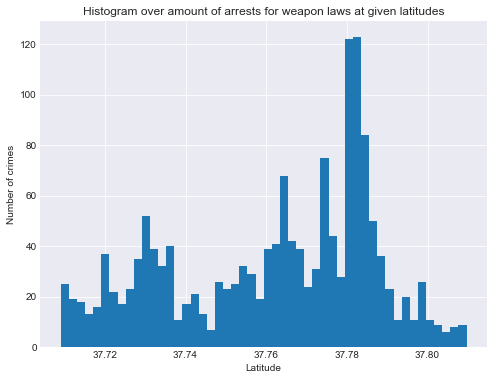

In [12]:
plt.figure(figsize=(8,6))
plt.hist(df_hist_weapon.Y, bins=50);
plt.xlabel('Latitude')
plt.ylabel('Number of crimes')
plt.title('Histogram over amount of arrests for weapon laws at given latitudes');

The two histograms above show the frequency of either crimes of type vehicle theft or weapon laws. Latitude is on the x-axis in both histograms, meaning that the histograms show the distribution of the crime frequency as a function of geographical location. 

In the first histogram where vehicle theft is considered, a large number of latitudes has a high frequency of reported crimes (frequency >= 150). Moreover, the spread of these latitudes is wide. 

The second histogram for weapon laws show a completely different pattern. This type of crime seems to be centralized on a few latitudes where the frequency is high and the spread is low. For the rest of the latitudes the frequency of the crime is generally low. 

## Part 4: A bit of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).
![example](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/city_hall_2020.png)
* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
We can call this a kind of visualization a *point scatter plot*.

In the following a map of San Fransisco (SF) is plotted using latitude and longitude. The city hall for SF is marked with a blue marker.  

In [13]:
# Create map and place SF City hall on the map
map_SF = folium.Map([37.773972,-122.431297], zoom_start=13)
folium.Marker([37.77919, -122.41914], popup = "City Hall").add_to(map_SF)
map_SF

As the map might not show, a screenshot of it is seen below

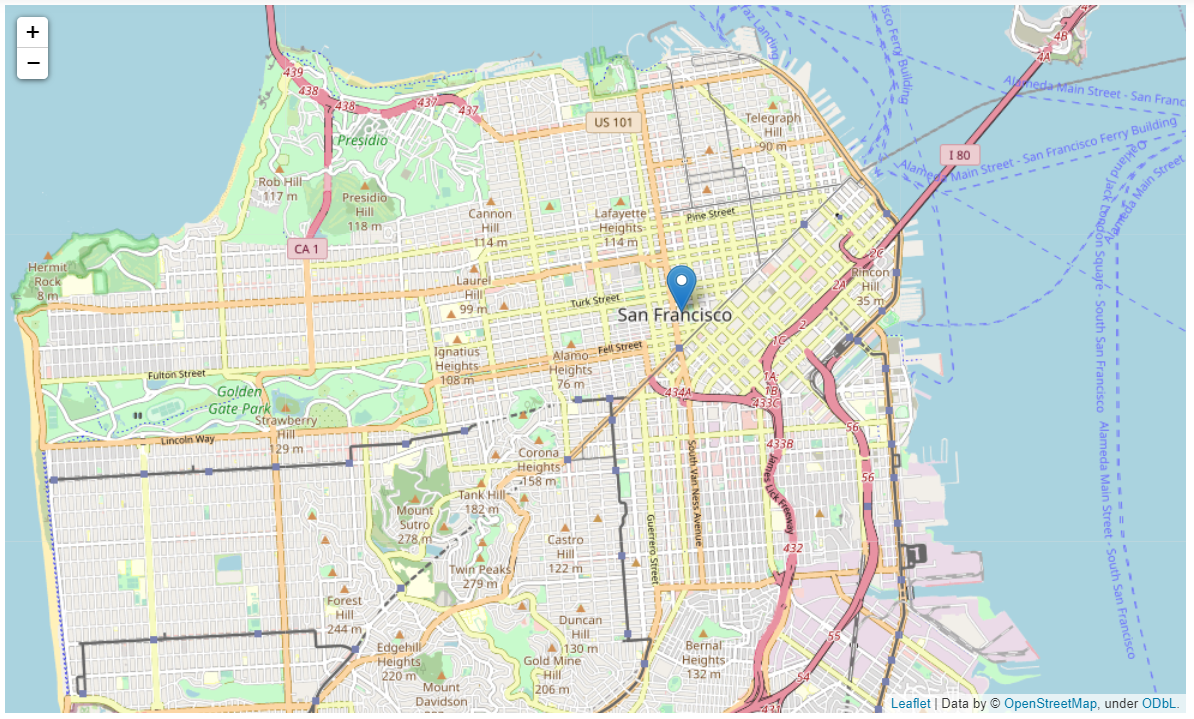

We consider data from June-July 2016 and make a point scatterplot for the geographical coordinates for the drug/narcotic related crimes in SF.

In [14]:
df_plot = crime[(crime.Category == "DRUG/NARCOTIC") & (crime.year == 2016) & ((crime.month == 6) | (crime.month == 7))]

map_drug = folium.Map([37.773972,-122.431297], zoom_start=13)

for x, y in zip(df_plot.X, df_plot.Y):
    folium.CircleMarker(location=[y,x],radius=2,color='red').add_to(map_drug)

map_drug

In case the map does not show, a screenshot of it is seen below. 
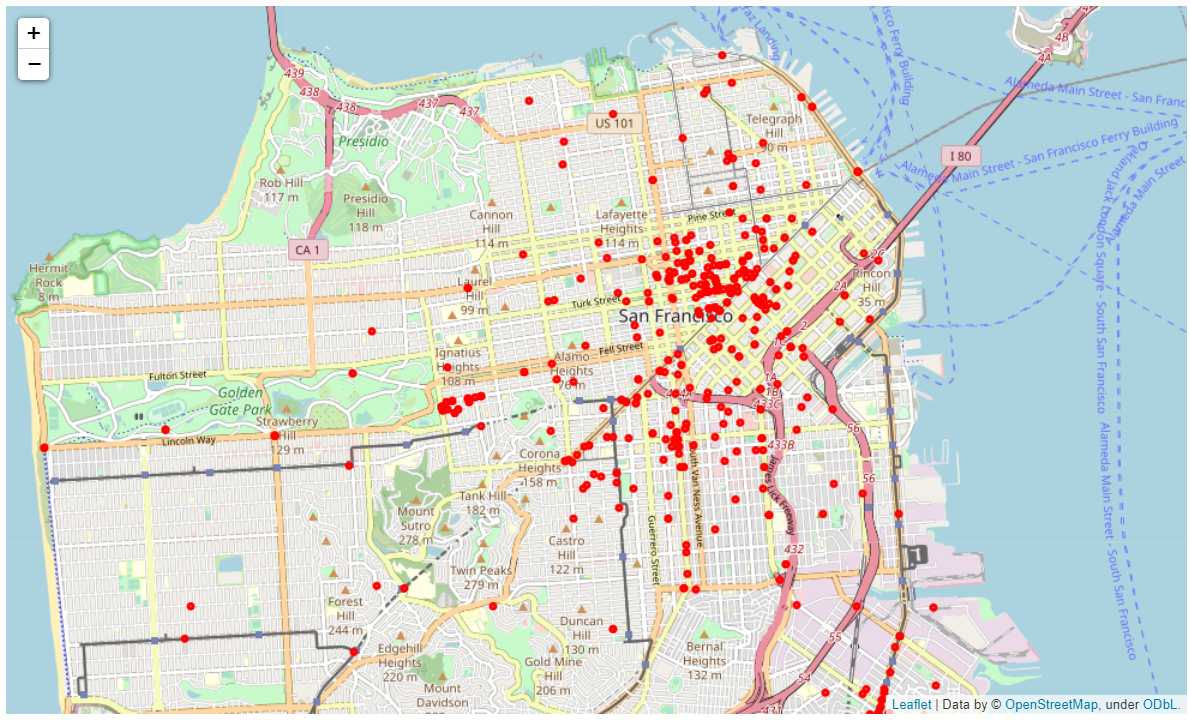

From this plot it is observed that many of the drug/narcotic related crimes are comitted relatively close to the city hall and in what is assumed to be the city centre of SF. 

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.
>
> The exercise is simply this:
> * For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

We lose (important) information when we aggregate data. Aggregation makes it difficult (if not impossible) to spot outliers (potential data-errors). When data is binned, the distribution of the data within that bin is lost. 

If we consider the crime prostitution we can see by the weekly pattern that most arrests happend on Thursday and decline in both directions. This seems a bit surprising, since there is not any immediate good explanations for why there is a peak midweek. By the hours of the week histogram the same observation can be seen, but it is also possible to see that the peak is around 18 o'clock. If this is due to a data-error the binned versions of this data is highly biased towards Thursdays around 18 o'clock which would result in a misconception of the crime patterns. This could result in a poor utilization of the police resources, e.g. if more officers are to patrole the areas on Thursdays at around 18 o'clock even though there is not more crime.

Similar to this notion, if the timestamps are considered and aggregated in intervals of 15 minutes it might seem that police resources are better spent at whole or half hours. Such misconception could lead the police to have more officers patrolling in these hours, which would be wasted if it was due to a data-error, possibly poor reporting of timestamps of crimes.

Finally, considering the Hall of Justice as a hotspot for sex offences seem unreasonable but investigating the aggregate data shows a bias for sex offences at the Hall of Justice. Such misconception would lead one to believe people are more prone to commit sex offences near the Hall of Justice, or perhaps more prostitutes are wandering about in the near vicinity. This could also result in poor utilization of police resources if officers patrole the area and that it was due to a data-error since there will not be more prostitutes in this area.